## K Means Clustering

Notebook is contributed by: [**aditya9110**](https://github.com/aditya9110)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/Rishit-dagli/Python3-by-practice/blob/master/Machine%20Learning/sklearn%20examples/K%20Mean%20Clustering/K-Mean%20Clustering%20.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/Rishit-dagli/Python3-by-practice/blob/master/Machine%20Learning/sklearn%20examples/K%20Mean%20Clustering/K-Mean%20Clustering%20.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

Here the sklearn preloaded dataset is being used -- **Iris Plant Dataset** from [UCI Machine Learning, Kaggle](https://www.kaggle.com/uciml/iris).

The dataset consist of width and length of leaf of plants and based on the these data we have predict whether it is

- Setosa
- Versicolour
- Virginica

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

## Load Dataset
The file consists of sepal length, sepal width, petal length, petal width and target value which is the type of flower classified as 0, 1, 2 (data type changed to int).

In [3]:
iris = datasets.load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data Visualization
 Here we used only two columns, petal length and petal width as they give most of the information compared to other columns and thus makes the clustering more effectively.

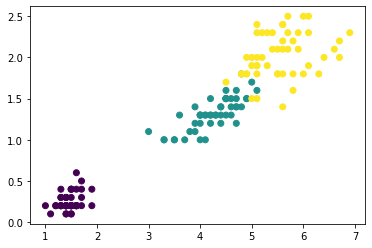

In [7]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c = df['target'], cmap = 'viridis')

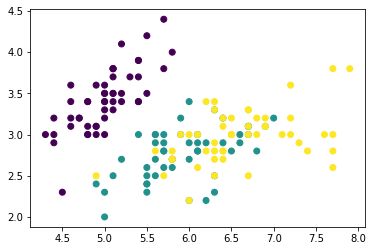

In [20]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c = df['target'], cmap = 'viridis')

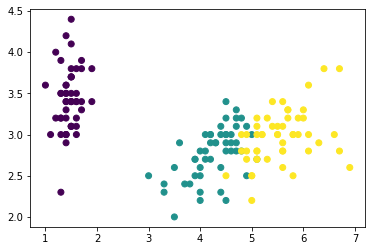

In [21]:
plt.scatter(df['petal length (cm)'], df['sepal width (cm)'], c = df['target'], cmap = 'viridis')

In [11]:
X = df[['petal length (cm)','petal width (cm)']]
y = df['target']
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Training and Predicting clusters

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

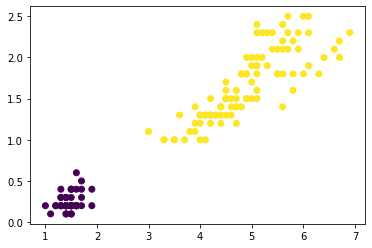

In [14]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c = kmeans.labels_, cmap = 'viridis')

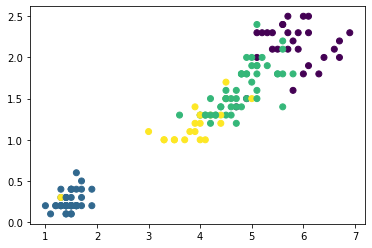

In [15]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c = kmeans.labels_, cmap = 'viridis')

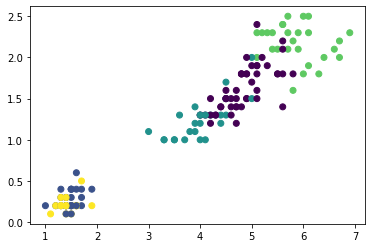

In [16]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c = kmeans.labels_, cmap = 'viridis')

## How to choose the value of clusters - Elbow Method

In [17]:
SSE = [] # Sum of Squared Errors
index = range(1, 10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    print(i, kmeans.inertia_)

1 600.0
2 222.36170496502308
3 139.82049635974982
4 114.41256181896094
5 90.92751382392052
6 80.02249599557439
7 71.8162459810614
8 62.28749580350201
9 54.81105203150129


Text(0, 0.5, 'SSE')

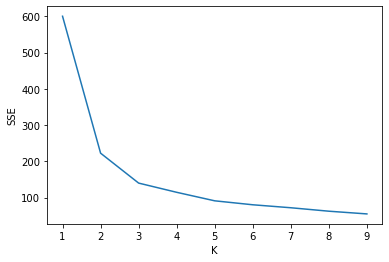

In [18]:
plt.plot(index, SSE)
plt.xlabel('K')
plt.ylabel('SSE')

## Finally the optimal number of clusters

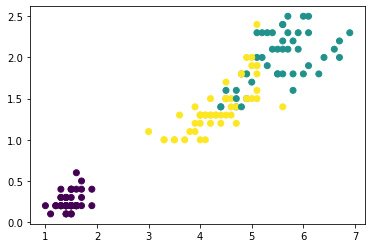

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c = kmeans.labels_, cmap = 'viridis')